Epoch 1/7
14/14 [==============================] - 13s 727ms/step - loss: 43.6010 - accuracy: 0.4907 - val_loss: 0.3888 - val_accuracy: 0.7368
Epoch 2/7
14/14 [==============================] - 10s 699ms/step - loss: 0.2402 - accuracy: 0.8953 - val_loss: 0.1584 - val_accuracy: 0.9737
Epoch 3/7
14/14 [==============================] - 8s 545ms/step - loss: 0.0553 - accuracy: 0.9907 - val_loss: 0.0327 - val_accuracy: 1.0000
Epoch 4/7
14/14 [==============================] - 9s 658ms/step - loss: 0.0079 - accuracy: 1.0000 - val_loss: 0.0075 - val_accuracy: 1.0000
Epoch 5/7
14/14 [==============================] - 6s 432ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.0066 - val_accuracy: 1.0000
Epoch 6/7
14/14 [==============================] - 6s 440ms/step - loss: 4.3180e-04 - accuracy: 1.0000 - val_loss: 0.0153 - val_accuracy: 0.9868
Epoch 7/7
3/3 [==============================] - 0s 128ms/step - loss: 0.0290 - accuracy: 0.9868
Validation Loss: 0.029032286256551743, Validation 

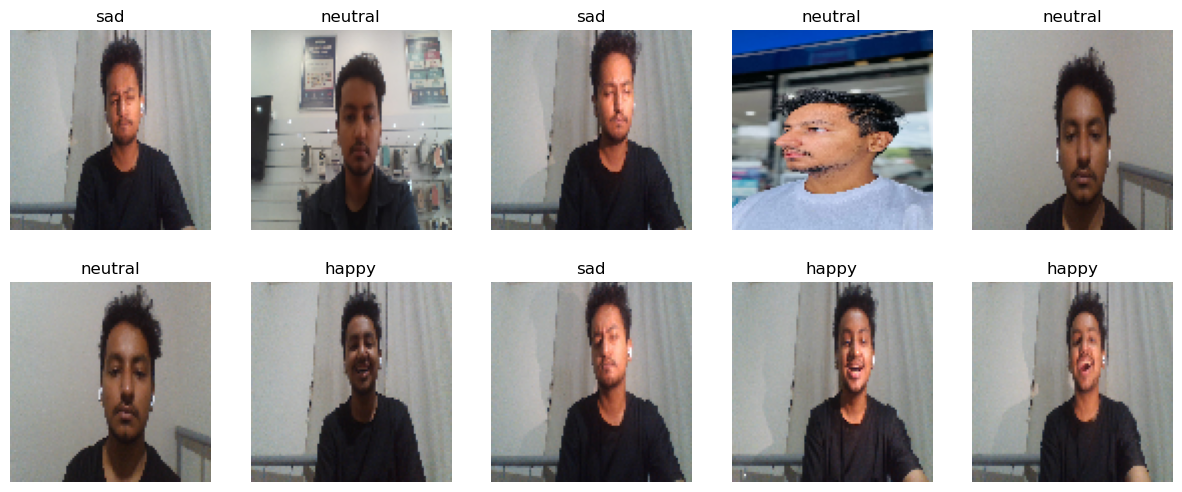

1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 47ms/step


In [3]:
import os
import numpy as np
import random
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import load_model

# Defining image dimensions
img_width, img_height = 100, 100

# Loading and preprocessing images
X = []
y = []

emotions = ['happy', 'sad', 'neutral']

for emotion in emotions:
    folder = f'{emotion}'
    label = emotions.index(emotion)
    for filename in os.listdir(folder):
        img = load_img(os.path.join(folder, filename), target_size=(img_width, img_height))
        img_array = img_to_array(img)
        X.append(img_array)
        y.append(label)

X = np.array(X)
y = np.array(y)

# Splitting the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.15)

# Defining CNN model architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(len(emotions), activation='softmax')  # Multiclass classification for emotions
])

# Compiling the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Training the model
history = model.fit(X_train, y_train, epochs=7, batch_size=32, validation_data=(X_val, y_val))

# Evaluating the model
loss, accuracy = model.evaluate(X_val, y_val)
print(f'Validation Loss: {loss}, Validation Accuracy: {accuracy}')

# Saving the model
model.save('my_emotion_detection_model.keras')

# Displaying sample images
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
axes = axes.ravel()

for i in range(10):
    idx = random.randint(0, len(X) - 1)
    axes[i].imshow(X[idx].astype(np.uint8))
    axes[i].set_title(emotions[y[idx]])
    axes[i].axis('off')

plt.show()

# Loading the saved model for real-time emotion detection
model = load_model('my_emotion_detection_model.keras')

# Function to preprocess image for model prediction
def preprocess_image(img):
    """
    Preprocesses the input image for model prediction.

    Parameters:
    - img: Input image.

    Returns:
    - img: Preprocessed image.
    """
    img = cv2.resize(img, (img_width, img_height))  # Resizing to match model input size
    img = img.astype('float32') / 255.0  # Normalizing pixel values
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)
    return img

# Function to detect emotions from video feed
def detect_emotions():
    """
    Detects emotions from the video feed captured by the webcam.
    """
    cap = cv2.VideoCapture(0)

    while True:
        ret, frame = cap.read()
        if not ret:
            break

        # Preprocess the frame
        preprocessed_frame = preprocess_image(frame)

        # Predict emotion
        emotions = ['Happy', 'Sad', 'Neutral']
        prediction = model.predict(preprocessed_frame)[0]
        emotion_label = emotions[np.argmax(prediction)]

        # Display the predicted emotion on the video frame
        cv2.putText(frame, f'Emotion: {emotion_label}', (20, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 255), 2)

        # Display the frame
        cv2.imshow('Emotion Detection', frame)

        # Check if the user pressed 'q' to quit the program
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    # Release the video capture object and close all OpenCV windows
    cap.release()
    cv2.destroyAllWindows()

# Running the emotion detection function
detect_emotions()
